In [1]:
import wrangle as w
import pandas as pd
import numpy as np
import matplotlib as plt


imports loaded successfully, awaiting commands...


## Acquire 

In [2]:
df=w.check_file_exists_gbq('cfpb.csv','service_key.json')

csv file found and loaded


In [3]:
df.head()

,date_received,product,subproduct,issue,subissue,consumer_complaint_narrative,company_public_response,company_name,state,zip_code,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed,complaint_id
0,2022-08-25,"Credit reporting, credit repair services, or o...",Other personal consumer report,Problem with a company's investigation into an...,Their investigation did not fix an error on yo...,NaN,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,CT,06514,NaN,Consent not provided,Web,2022-08-25,Closed with non-monetary relief,True,NaN,5914984
1,2018-03-22,"Money transfer, virtual currency, or money ser...",Mobile or digital wallet,Unauthorized transactions or other transaction...,NaN,On XX/XX/XXXX at XXXX XXXX my sister ( an XXXX...,NaN,"Early Warning Services, LLC",TX,77086.0,Servicemember,Consent provided,Web,2018-03-22,Closed with explanation,True,NaN,2850925
2,2020-03-20,"Payday loan, title loan, or personal loan",Installment loan,Charged fees or interest you didn't expect,NaN,The amount of money going toward the principal...,Company believes it acted appropriately as aut...,"Duvera Billing Services, LLC",PA,19131,NaN,Consent provided,Web,2020-03-20,Closed with explanation,True,NaN,3573868
3,2016-05-17,Credit card,NaN,Identity theft / Fraud / Embezzlement,NaN,NaN,NaN,Resurgent Capital Services L.P.,NaN,NaN,NaN,NaN,Fax,2016-05-27,Closed with explanation,True,False,1929431
4,2016-10-18,Credit card,NaN,Billing disputes,NaN,"I bought XXXX TVs from XXXX. One was fine, the...",NaN,TD BANK US HOLDING COMPANY,CT,06365,Older American,Consent provided,Web,2016-10-18,Closed with monetary relief,True,False,2164764


## Pre cleaning

In [4]:
df.tags.value_counts(dropna=False)

NaN                              3076693
Servicemember                     216614
Older American                    133725
Older American, Servicemember      31874
Name: tags, dtype: int64

In [5]:
df.tags=df.tags.fillna('Normal')

In [6]:
df.tags.value_counts(dropna=False)

Normal                           3076693
Servicemember                     216614
Older American                    133725
Older American, Servicemember      31874
Name: tags, dtype: int64

In [7]:
df.submitted_via.value_counts(dropna=False)

Web             2950186
Referral         239888
Phone            154119
Postal mail       87903
Fax               25659
Web Referral        726
Email               425
Name: submitted_via, dtype: int64

In [8]:
df.consumer_disputed.value_counts(dropna=False)

NaN      2690507
False     620021
True      148378
Name: consumer_disputed, dtype: int64

In [9]:
df.sample(5)

,date_received,product,subproduct,issue,subissue,consumer_complaint_narrative,company_public_response,company_name,state,zip_code,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed,complaint_id
1553029,2018-05-06,Debt collection,Medical debt,Written notification about debt,Didn't receive notice of right to dispute,NaN,Company disputes the facts presented in the co...,"NRA Group, LLC",NY,12590.0,Normal,Consent not provided,Web,2018-05-06,Closed with explanation,True,NaN,2897911
689670,2023-01-19,Checking or savings account,Checking account,Managing an account,Fee problem,Wells Fargo customer since 2011. \nCharged OD ...,Company has responded to the consumer and the ...,WELLS FARGO & COMPANY,CA,94131.0,Servicemember,Consent provided,Web,2023-01-19,Closed with explanation,True,NaN,6458716
772660,2023-03-22,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",OK,73130.0,Normal,NaN,Web,2023-03-22,In progress,True,NaN,6733440
2616515,2016-06-30,Credit reporting,NaN,Incorrect information on credit report,Account status,NaN,NaN,"EQUIFAX, INC.",NY,11040,Normal,Consent not provided,Web,2016-06-30,Closed with explanation,True,False,1994269
2124535,2022-01-04,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,This is XXXX XXXX who is submitting this CFPB ...,NaN,Lending Club Corp,CA,94568.0,Normal,Consent provided,Web,2022-01-04,Closed with explanation,True,NaN,5070601


In [10]:
df.consumer_complaint_narrative.count()

1246739

## Clean Data:

In [11]:
df=w.clean_data(df)
df

,date_received,narrative,company_name,state,tags,company_response_to_consumer,product_bins
0,2018-03-22,On XX/XX/XXXX at XXXX XXXX my sister ( an XXXX...,"Early Warning Services, LLC",TX,Servicemember,Closed with explanation,money_service
1,2020-03-20,The amount of money going toward the principal...,"Duvera Billing Services, LLC",PA,Normal,Closed with explanation,loans
2,2016-10-18,"I bought XXXX TVs from XXXX. One was fine, the...",TD BANK US HOLDING COMPANY,CT,Older American,Closed with monetary relief,credit_card
3,2023-02-24,I've now missed two closing dates XX/XX/XXXX a...,Home American Mortgage Corp,FL,Normal,Closed with explanation,mortgage
4,2018-02-15,This is a Capitol one prepaid card. The proble...,CAPITAL ONE FINANCIAL CORPORATION,GA,Normal,Closed with explanation,credit_card
...,...,...,...,...,...,...,...
1246731,2021-10-11,In XXXX I consolidated my student loans with F...,FIRST REPUBLIC BANK,MA,Servicemember,Closed with explanation,loans
1246732,2018-07-17,I made a commitment to Chase bank in XX/XX/201...,JPMORGAN CHASE & CO.,TX,Normal,Closed with explanation,bank
1246733,2020-01-15,I am afraid we have had a breach of our origin...,JPMORGAN CHASE & CO.,CA,Normal,Closed with explanation,debt_collection
1246734,2017-10-10,"On XXXX XXXX, XXXX, I faxed a payoff amount re...",M&T BANK CORPORATION,TX,Normal,Closed with explanation,mortgage


In [12]:
df.	company_name.value_counts()

EQUIFAX, INC.                               195447
TRANSUNION INTERMEDIATE HOLDINGS, INC.      172644
Experian Information Solutions Inc.         167388
WELLS FARGO & COMPANY                        32813
BANK OF AMERICA, NATIONAL ASSOCIATION        31978
                                             ...  
Credit Mount                                     1
GREATAMERICA FINANCIAL SERVICES CORP.            1
Colonial Mortgage Service Co. Of America         1
snw investments                                  1
Consumer Defense Group, LLC                      1
Name: company_name, Length: 5597, dtype: int64

In [13]:
boa_df=df[df.company_name=='BANK OF AMERICA, NATIONAL ASSOCIATION']


In [14]:
boa_df.date_received.value_counts()

2018-04-28    46
2022-09-20    36
2022-09-13    34
2023-01-13    34
2022-08-29    34
              ..
2018-11-27     1
2015-12-25     1
2015-09-13     1
2018-07-28     1
2016-05-22     1
Name: date_received, Length: 2898, dtype: int64

 ## NLTK Language Cleaning


In [15]:
df=w.prep_narrative(df)
df.head()

,date_received,narrative,company_name,state,tags,company_response_to_consumer,product_bins,clean,lemon
0,2018-03-22,On XX/XX/XXXX at XXXX XXXX my sister ( an XXXX...,"Early Warning Services, LLC",TX,Servicemember,Closed with explanation,money_service,on at my sister an account holder sent me usd ...,sister account holder sent usd via website usi...
1,2020-03-20,The amount of money going toward the principal...,"Duvera Billing Services, LLC",PA,Normal,Closed with explanation,loans,the amount of money going toward the principal...,amount money going toward principal really low...
2,2016-10-18,"I bought XXXX TVs from XXXX. One was fine, the...",TD BANK US HOLDING COMPANY,CT,Older American,Closed with monetary relief,credit_card,i bought tvs from one was fine the other arriv...,bought tv one fine arrived damaged requested r...
3,2023-02-24,I've now missed two closing dates XX/XX/XXXX a...,Home American Mortgage Corp,FL,Normal,Closed with explanation,mortgage,ive now missed two closing dates and due to no...,ive missed two closing date due negligence par...
4,2018-02-15,This is a Capitol one prepaid card. The proble...,CAPITAL ONE FINANCIAL CORPORATION,GA,Normal,Closed with explanation,credit_card,this is a capitol one prepaid card the problem...,capitol one prepaid card problem said late pay...


## Split Data

In [16]:
train,validate,test=w.split_data(df,'company_response_to_consumer')

Prepared DF: (1246736, 9)
Train: (748041, 9)
Validate: (249347, 9)
Test: (249348, 9)


In [17]:
train.to_parquet('train.parquet')
validate.to_parquet('validate.parquet')
test.to_parquet('test.parquet')
train = pd.read_parquet('train.parquet')
validate = pd.read_parquet('validate.parquet')
test = pd.read_parquet('test.parquet')

# Exploration:

In [84]:
import wrangle as w
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import nltk
alpha=0.05

In [19]:
train = pd.read_parquet('train.parquet')

In [20]:
sentiment_df=w.sentiment_analysis(train)

In [21]:
pd.set_option('display.max_columns', None)

In [22]:
sentiment_df.head()

,date_received,narrative,company_name,state,tags,company_response_to_consumer,product_bins,clean,lemon,sentiment
944726,2019-03-14,I submitted a complaint in XX/XX/2019 XXXX and...,Lending Club Corp,OR,Normal,Closed with monetary relief,loans,i submitted a complaint in and lendingclub did...,submitted complaint lendingclub thing letter l...,-0.5583
570128,2022-02-01,XX/XX/XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX ...,"CITIBANK, N.A.",GA,Normal,Closed with explanation,debt_collection,re intent to file lawsuit no response for vali...,intent file lawsuit response validation docume...,0.7884
523259,2018-06-05,In XX/XX/2017 thru XX/XX/2017 XXXX reported on...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",GA,Normal,Closed with explanation,credit_report,in thru reported on my credit report delinquen...,thru reported credit report delinquency due fl...,-0.8853
753694,2020-07-10,"Good morning, I recently checked my credit rep...","TRANSUNION INTERMEDIATE HOLDINGS, INC.",FL,Normal,Closed with explanation,credit_report,good morning i recently checked my credit repo...,good morning recently checked credit report no...,0.9525
999740,2018-05-25,My husband and I have consolidated our student...,Equitable Acceptance Corp,PA,Normal,Closed with explanation,loans,my husband and i have consolidated our student...,husband consolidated student loan thru company...,-0.4588


## 3. Do narratives with a neutral or positive sentiment analysis relating to bank account products lead to a response of closed with monetary relief?

In [33]:
sentiment_df.company_response_to_consumer.value_counts()

Closed with explanation            589373
Closed with non-monetary relief    123170
Closed with monetary relief         30578
Untimely response                    2675
Closed                               2245
Name: company_response_to_consumer, dtype: int64

In [36]:
sentiment_df.product_bins.value_counts()

credit_report      383786
debt_collection    121108
credit_card         66157
mortgage            61694
loans               49686
bank                46960
money_service       18650
Name: product_bins, dtype: int64

In [24]:
cwe_df=sentiment_df[sentiment_df.company_response_to_consumer=='Closed with explanation']

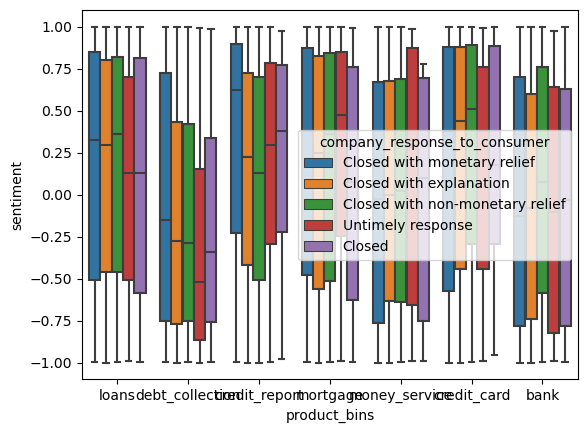

In [37]:

sns.boxplot(data=sentiment_df, x='product_bins', y='sentiment', hue='company_response_to_consumer')
plt.show()

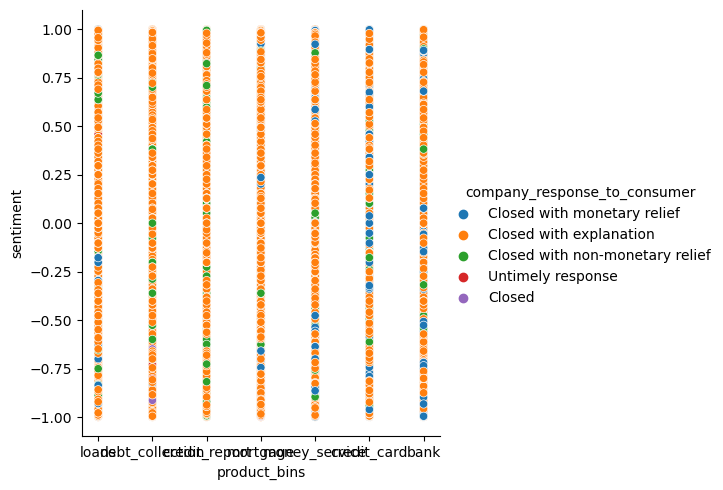

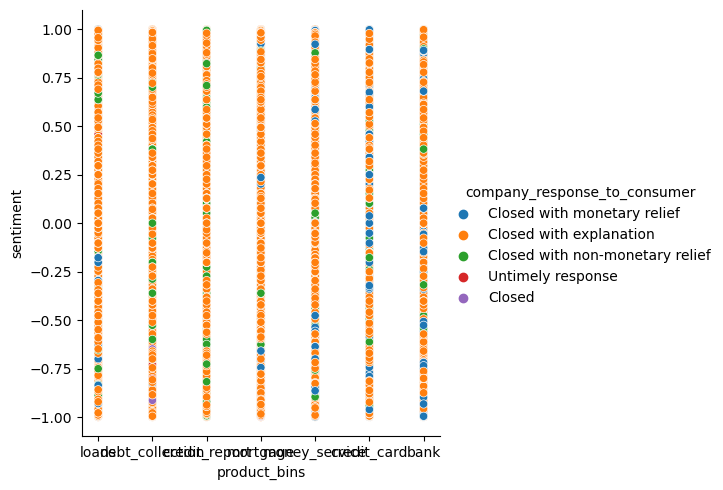

In [30]:
sns.relplot(data=sentiment_df, x='product_bins', y='sentiment', hue='company_response_to_consumer')
plt.show()

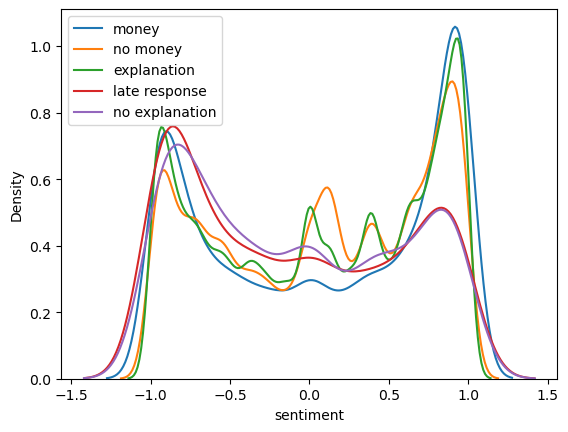

In [35]:

sns.kdeplot(sentiment_df[sentiment_df.company_response_to_consumer=='Closed with monetary relief'].sentiment, label='money')
sns.kdeplot(sentiment_df[sentiment_df.company_response_to_consumer=='Closed with non-monetary relief'].sentiment, label='no money')
sns.kdeplot(sentiment_df[sentiment_df.company_response_to_consumer=='Closed with explanation'].sentiment, label='explanation')
sns.kdeplot(sentiment_df[sentiment_df.company_response_to_consumer=='Untimely response'].sentiment, label='late response')
sns.kdeplot(sentiment_df[sentiment_df.company_response_to_consumer=='Closed'].sentiment, label='no explanation')
plt.legend(['money', 'no money','explanation','late response','no explanation'])
plt.show()

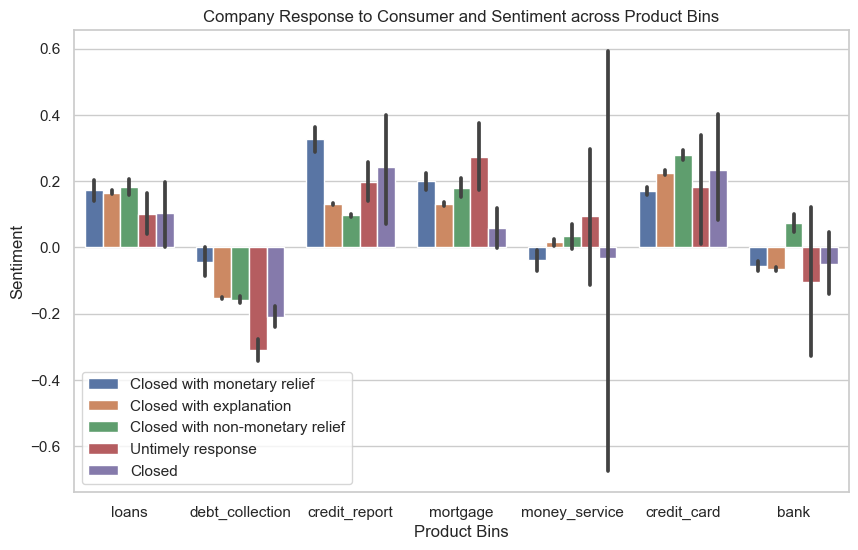

In [45]:

# Set the figure size
plt.figure(figsize=(10, 6))

# Customize the plot style
sns.set(style="whitegrid")

# Create the bar plot
sns.barplot(data=sentiment_df, x='product_bins', y='sentiment', hue='company_response_to_consumer')

# Set the labels and title
plt.xlabel('Product Bins')
plt.ylabel('Sentiment')
plt.title('Company Response to Consumer and Sentiment across Product Bins')

# Adjust the legend position
plt.legend(loc='best')

# Show the plot
plt.show()


In [61]:
# Create example data
group1 = np.random.normal(loc=10, scale=2, size=100)
group2 = np.random.normal(loc=12, scale=2, size=100)

# Calculate the theoretical means for each group
theoretical_mean_group1 = np.mean(group1)
theoretical_mean_group2 = np.mean(group2)

# Combine the group data and assign a group label
data = pd.DataFrame({'group1': group1,
                     'group2': group2})

# Set the significance level (alpha)
alpha = 0.05

# Perform Levene test for variance comparison
tstat, pvalue = stats.levene(group1, group2)

print("Running Levene Test...")
if pvalue > alpha:
    print(f'p-value: {pvalue:.10f} > {alpha}?')
    print("Variance is true, proceed with ANOVA test...")
else:
    print("p-value:", pvalue)
    print("Variance is not true. Consider alternative tests for comparing groups.")


Running Levene Test...
p-value: 0.8384713155 > 0.05?
Variance is true, proceed with ANOVA test...


In [42]:

# Get unique categories of product_bins
unique_bins = sentiment_df['product_bins'].unique()

# Perform ANOVA test for each category of product_bins
for bin_category in unique_bins:
    # Create a subset of the data for the specific product_bins category
    subset = sentiment_df[sentiment_df['product_bins'] == bin_category]

    # Perform one-way ANOVA for the subset
    result = stats.f_oneway(*[subset[subset['company_response_to_consumer'] == response]['sentiment']
                              for response in subset['company_response_to_consumer'].unique()])

    # Print the ANOVA test result for the subset
    print("Product Bins:", bin_category)
    print("ANOVA p-value:", result.pvalue)

    if result.pvalue < alpha:
        print("The p-value is less than alpha. There is a significant effect of sentiment on company response to the consumer.")
    else:
        print("The p-value is greater than or equal to alpha. There is no significant effect of sentiment on company response to the consumer.")

    print()  # Print an empty line between each category's results


Product Bins: loans
ANOVA p-value: 0.09347439102247616
The p-value is greater than or equal to alpha. There is no significant effect of sentiment on company response to the consumer.

Product Bins: debt_collection
ANOVA p-value: 1.4646876555007634e-26
The p-value is less than alpha. There is a significant effect of sentiment on company response to the consumer.

Product Bins: credit_report
ANOVA p-value: 1.5156171719725783e-71
The p-value is less than alpha. There is a significant effect of sentiment on company response to the consumer.

Product Bins: mortgage
ANOVA p-value: 5.5666796569672736e-09
The p-value is less than alpha. There is a significant effect of sentiment on company response to the consumer.

Product Bins: money_service
ANOVA p-value: 0.007916867114519858
The p-value is less than alpha. There is a significant effect of sentiment on company response to the consumer.

Product Bins: credit_card
ANOVA p-value: 2.1118595406266727e-24
The p-value is less than alpha. There is 

## 6.Does narrative length relate to company response?

In [64]:
sentiment_df['message_length'] = sentiment_df['narrative'].str.len()

In [85]:

def get_word_count(text):
    tokens = nltk.word_tokenize(text)  # Tokenize the text into words
    return len(tokens)  # Return the count of tokens (words)


In [86]:
sentiment_df['word_count'] = sentiment_df['narrative'].apply(get_word_count)

In [79]:
sentiment_df['word_count'] = sentiment_df.narrative.apply(w.basic_clean).apply(len)

In [80]:
sentiment_df.head(2)

,date_received,narrative,company_name,state,tags,company_response_to_consumer,product_bins,clean,lemon,sentiment,message_length,word_count
944726,2019-03-14,I submitted a complaint in XX/XX/2019 XXXX and...,Lending Club Corp,OR,Normal,Closed with monetary relief,loans,i submitted a complaint in and lendingclub did...,submitted complaint lendingclub thing letter l...,-0.5583,272,265
570128,2022-02-01,XX/XX/XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX ...,"CITIBANK, N.A.",GA,Normal,Closed with explanation,debt_collection,re intent to file lawsuit no response for vali...,intent file lawsuit response validation docume...,0.7884,1025,1006


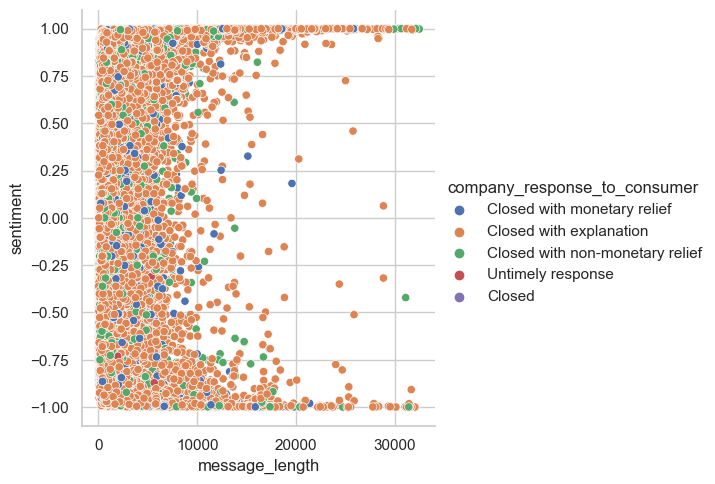

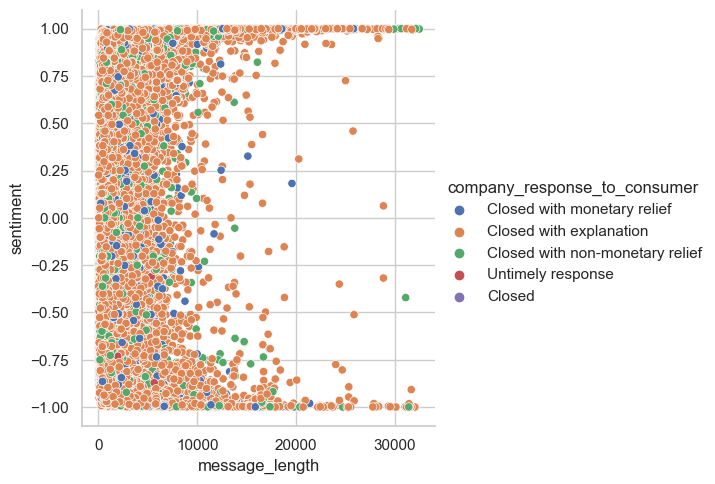

In [68]:
sns.relplot(data=sentiment_df, x='message_length', y='sentiment', hue='company_response_to_consumer')
plt.show()

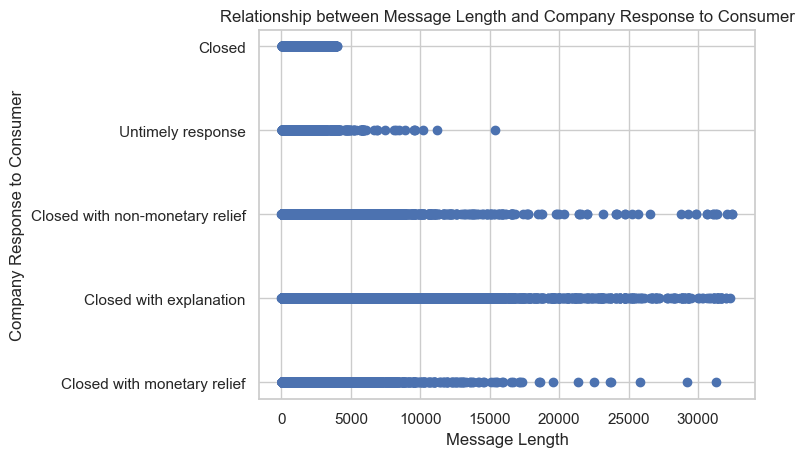

In [69]:
plt.scatter(sentiment_df['message_length'], sentiment_df['company_response_to_consumer'])

plt.xlabel('Message Length')
plt.ylabel('Company Response to Consumer')
plt.title('Relationship between Message Length and Company Response to Consumer')

plt.show()

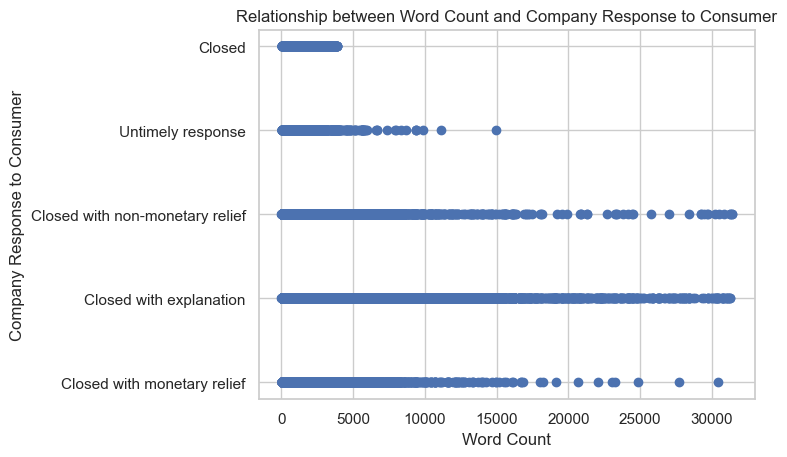

In [81]:
plt.scatter(sentiment_df['word_count'], sentiment_df['company_response_to_consumer'])

plt.xlabel('Word Count')
plt.ylabel('Company Response to Consumer')
plt.title('Relationship between Word Count and Company Response to Consumer')

plt.show()

In [74]:

result = stats.f_oneway(*[sentiment_df[sentiment_df['company_response_to_consumer'] == response]['message_length']
                          for response in sentiment_df['company_response_to_consumer'].unique()])

p_value = result.pvalue


print("ANOVA p-value:", p_value)
if p_value < alpha:
    print("The p-value is less than alpha. There is a significant relationship between message length and company response to the consumer.")
else:
    print("The p-value is greater than or equal to alpha. There is no significant relationship between message length and company response to the consumer.")

ANOVA p-value: 0.0
The p-value is less than alpha. There is a significant relationship between message length and company response to the consumer.
